In [ ]:
import pandas as pd

# Load the training dataset
train_data = pd.read_csv('train.csv')

# Display the first few rows to understand the structure
print(train_data.head())

# Check the basic structure of the dataset
print(train_data.info())

# Summary statistics of the dataset
print(train_data.describe())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
                 id      target
coun

In [ ]:
# Check for missing values in each column
print(train_data.isnull().sum())

# Drop unnecessary columns or handle missing values
# If 'location' and 'keyword' are not critical, they can be dropped.
train_data_cleaned = train_data.drop(['location', 'keyword'], axis=1)

# Drop rows with missing text data
train_data_cleaned = train_data_cleaned.dropna(subset=['text'])

# Confirm no missing values remain
print(train_data_cleaned.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
id        0
text      0
target    0
dtype: int64


<ipython-input-4-fbb35cfb1f74>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data_cleaned, x='target', palette='viridis')


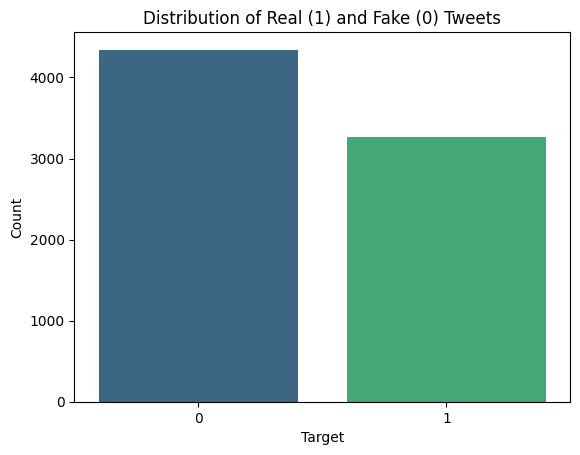

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of real (1) and fake (0) tweets
sns.countplot(data=train_data_cleaned, x='target', palette='viridis')
plt.title('Distribution of Real (1) and Fake (0) Tweets')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

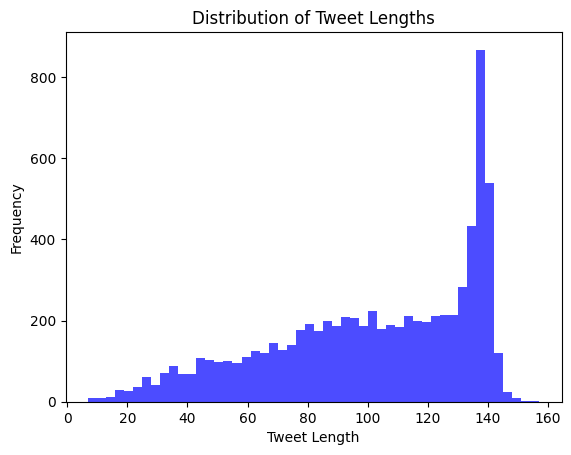

In [ ]:
# Calculate the length of each tweet
train_data_cleaned['text_length'] = train_data_cleaned['text'].apply(len)

# Plot histogram of tweet lengths
plt.hist(train_data_cleaned['text_length'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

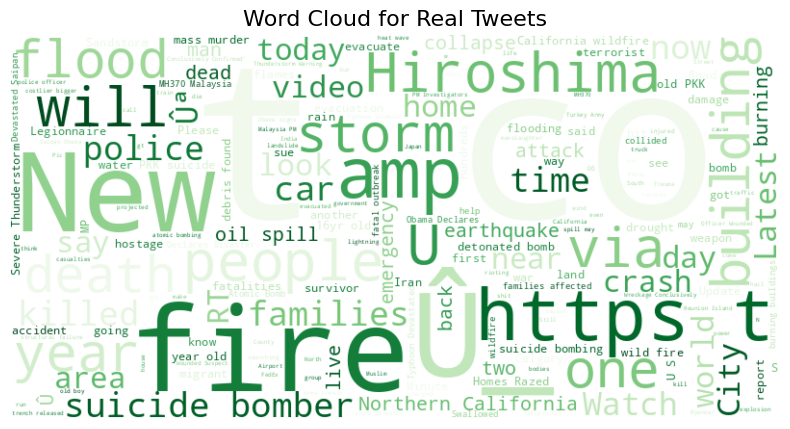

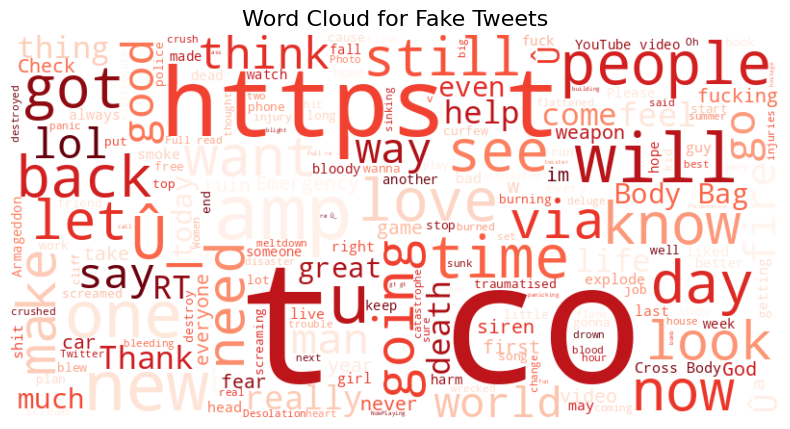

In [ ]:
from wordcloud import WordCloud

# Separate real and fake tweets
real_tweets = ' '.join(train_data_cleaned[train_data_cleaned['target'] == 1]['text'])
fake_tweets = ' '.join(train_data_cleaned[train_data_cleaned['target'] == 0]['text'])

# Generate word clouds
real_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(real_tweets)
fake_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(fake_tweets)

# Plot word clouds
plt.figure(figsize=(10, 5))
plt.imshow(real_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Real Tweets', fontsize=16)
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(fake_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake Tweets', fontsize=16)
plt.show()


In [ ]:
#step 2 ->Text Processing

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Function to clean text
def clean_text(text):
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply the cleaning function
train_data_cleaned['cleaned_text'] = train_data_cleaned['text'].apply(clean_text)
print(train_data_cleaned['cleaned_text'].head())

0    Our Deeds are the Reason of this earthquake Ma...
1                Forest fire near La Ronge Sask Canada
2    All residents asked to shelter in place are be...
3    people receive wildfires evacuation orders in ...
4    Just got sent this photo from Ruby Alaska as s...
Name: cleaned_text, dtype: object


In [ ]:
# Load English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    words = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    return ' '.join([word for word in words if word not in stop_words])

# Apply the stopword removal function
train_data_cleaned['cleaned_text'] = train_data_cleaned['cleaned_text'].apply(remove_stopwords)
print(train_data_cleaned['cleaned_text'].head())

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3    people receive wildfires evacuation orders cal...
4    got sent photo ruby alaska smoke wildfires pou...
Name: cleaned_text, dtype: object


In [ ]:
# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to apply stemming
def apply_stemming(text):
    words = word_tokenize(text)
    return ' '.join([stemmer.stem(word) for word in words])

# Apply stemming
train_data_cleaned['stemmed_text'] = train_data_cleaned['cleaned_text'].apply(apply_stemming)
print(train_data_cleaned['stemmed_text'].head())


0            deed reason earthquak may allah forgiv us
1                 forest fire near la rong sask canada
2    resid ask shelter place notifi offic evacu she...
3          peopl receiv wildfir evacu order california
4    got sent photo rubi alaska smoke wildfir pour ...
Name: stemmed_text, dtype: object


In [ ]:
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to apply lemmatization
def apply_lemmatization(text):
    words = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

# Apply lemmatization
train_data_cleaned['lemmatized_text'] = train_data_cleaned['cleaned_text'].apply(apply_lemmatization)
print(train_data_cleaned['lemmatized_text'].head())


0           deed reason earthquake may allah forgive u
1                forest fire near la ronge sask canada
2    resident asked shelter place notified officer ...
3    people receive wildfire evacuation order calif...
4    got sent photo ruby alaska smoke wildfire pour...
Name: lemmatized_text, dtype: object


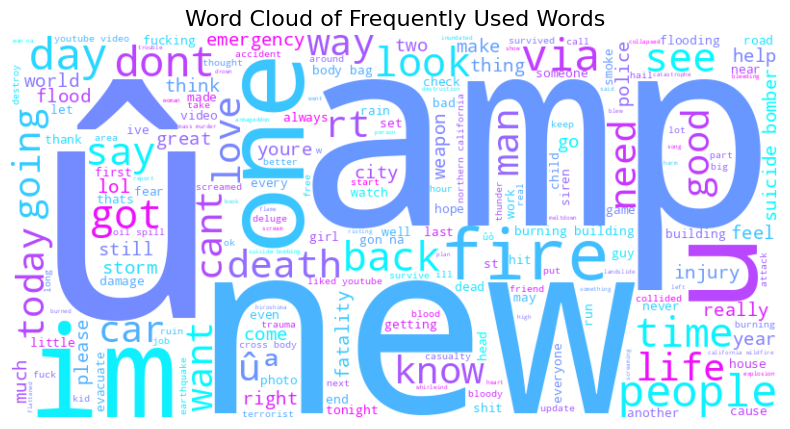

In [ ]:
# Combine all cleaned text for visualization
all_words = ' '.join(train_data_cleaned['lemmatized_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='cool').generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequently Used Words', fontsize=16)
plt.show()

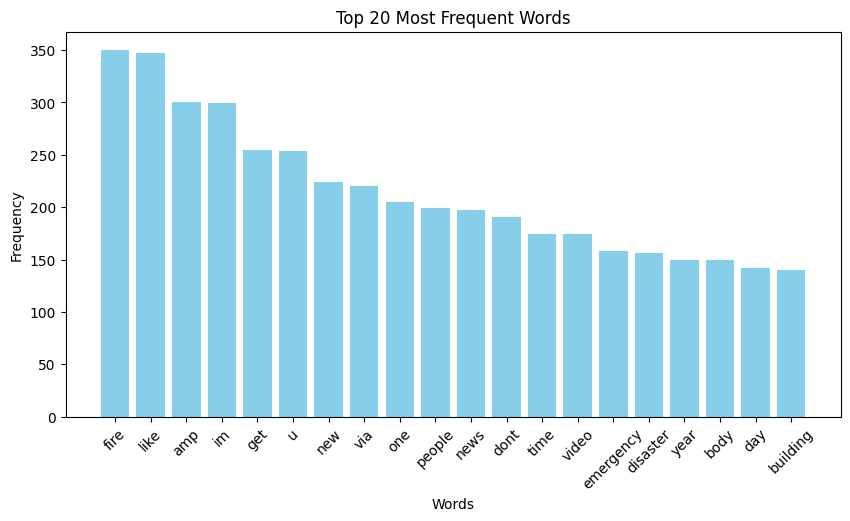

In [ ]:
from collections import Counter

# Tokenize words and count frequencies
word_list = word_tokenize(all_words)
word_freq = Counter(word_list)

# Get the top 20 most common words
most_common_words = word_freq.most_common(20)

# Plot the bar chart
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import torch
import numpy as np


In [ ]:
# Initialize CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000)  # Limit features to 5000 most frequent words

# Fit and transform the lemmatized text
X_bow = count_vectorizer.fit_transform(train_data_cleaned['lemmatized_text'])

# Convert to array for further use
X_bow_array = X_bow.toarray()

print("Shape of Bag of Words features:", X_bow_array.shape)

Shape of Bag of Words features: (7613, 5000)


In [ ]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to 5000 most important words

# Fit and transform the lemmatized text
X_tfidf = tfidf_vectorizer.fit_transform(train_data_cleaned['lemmatized_text'])

# Convert to array for further use
X_tfidf_array = X_tfidf.toarray()

print("Shape of TF-IDF features:", X_tfidf_array.shape)


Shape of TF-IDF features: (7613, 5000)


In [ ]:
# Tokenize the lemmatized text into lists of words
tokenized_texts = train_data_cleaned['lemmatized_text'].apply(word_tokenize)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=5, workers=4)

# Function to calculate average word embeddings for each document
def get_average_word2vec(text, model, vector_size):
    vectors = [model.wv[word] for word in text if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

# Apply the function to the tokenized texts
X_word2vec = np.array([get_average_word2vec(text, word2vec_model, 100) for text in tokenized_texts])

print("Shape of Word2Vec features:", X_word2vec.shape)


Shape of Word2Vec features: (7613, 100)


In [ ]:
pip install transformers


In [ ]:
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel

# Custom Dataset for Text Data
class TextDataset(Dataset):
    def __init__(self, texts):
        self.texts = texts

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx]

# Load the pre-trained BERT tokenizer and model
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased').to('cuda')  # Move model to GPU

# Function to extract BERT embeddings for a batch
def get_bert_embeddings_batch(batch_texts, tokenizer, model, max_length=128):
    inputs = tokenizer(batch_texts, return_tensors="pt", truncation=True, padding=True, max_length=max_length)
    inputs = {key: val.to('cuda') for key, val in inputs.items()}  # Move inputs to GPU
    with torch.no_grad():
        outputs = model(**inputs)
    cls_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()  # CLS token embeddings
    return cls_embeddings

# Process text data in batches
def process_in_batches(texts, tokenizer, model, batch_size=32, max_length=128):
    dataset = TextDataset(texts)  # Wrap texts in a custom Dataset
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    embeddings = []

    for batch_texts in data_loader:
        batch_embeddings = get_bert_embeddings_batch(batch_texts, tokenizer, model, max_length)
        embeddings.append(batch_embeddings)

    return np.vstack(embeddings)

# Apply batch processing to lemmatized text
texts = train_data_cleaned['lemmatized_text'].tolist()  # Ensure this column exists in your DataFrame
batch_size = 32  # Adjust based on GPU memory

X_bert = process_in_batches(texts, bert_tokenizer, bert_model, batch_size)

# Save the BERT embeddings
np.save("bert_features.npy", X_bert)
print("Shape of BERT features:", X_bert.shape)
print("BERT features saved as 'bert_features.npy'.")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Shape of BERT features: (7613, 768)
BERT features saved as 'bert_features.npy'.


In [ ]:
#Model Building

In [ ]:
# Import necessary libraries

#using tf-idf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Get the indices of the data
indices = np.arange(len(train_data_cleaned))

# Split the data into training and testing sets using TF-IDF features
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(X_tfidf_array, train_data_cleaned['target'], indices, test_size=0.2, random_state=42)

In [ ]:
log_reg = LogisticRegression(max_iter=1000)  # Set max_iter if you face convergence issues
svm = SVC()
naive_bayes = GaussianNB()

In [ ]:
# Train the models
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Make predictions
log_reg_preds = log_reg.predict(X_test)
svm_preds = svm.predict(X_test)
naive_bayes_preds = naive_bayes.predict(X_test)

In [ ]:
# Evaluate models
models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes']
predictions = [log_reg_preds, svm_preds, naive_bayes_preds]

In [ ]:
for model_name, preds in zip(models, predictions):
    print(f"\nEvaluating {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(f"Precision: {precision_score(y_test, preds, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, preds, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test, preds, average='weighted'):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, preds)}")


Evaluating Logistic Regression:
Accuracy: 0.7971
Precision: 0.7999
Recall: 0.7971
F1-Score: 0.7933
Confusion Matrix:
[[779  95]
 [214 435]]

Evaluating Support Vector Machine:
Accuracy: 0.7945
Precision: 0.7984
Recall: 0.7945
F1-Score: 0.7901
Confusion Matrix:
[[783  91]
 [222 427]]

Evaluating Naive Bayes:
Accuracy: 0.6376
Precision: 0.6792
Recall: 0.6376
F1-Score: 0.6348
Confusion Matrix:
[[455 419]
 [133 516]]


In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# def evaluate_model(model, X_test, y_test):
#     # Predict the labels for the test set
#     y_pred = model.predict(X_test)

#     # Calculate evaluation metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     cm = confusion_matrix(y_test, y_pred)

#     # Print the results
#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")
#     print(f"F1-Score: {f1:.4f}")
#     print("Confusion Matrix:")
#     print(cm)

In [ ]:
# #using bag of word
# from sklearn.naive_bayes import MultinomialNB
# # Split the data into training and testing sets using X_bow_array
# X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow_array, train_data_cleaned['target'], test_size=0.2, random_state=42)

# # Initialize models
# log_reg_bow = LogisticRegression(max_iter=1000)
# svm_bow = SVC()
# naive_bayes_bow = MultinomialNB()

# # Train the models
# log_reg_bow.fit(X_train_bow, y_train)
# svm_bow.fit(X_train_bow, y_train)
# naive_bayes_bow.fit(X_train_bow, y_train)

# # Evaluate the models
# print("Evaluating Logistic Regression with BoW:")
# evaluate_model(log_reg_bow, X_test_bow, y_test)

# print("\nEvaluating Support Vector Machine with BoW:")
# evaluate_model(svm_bow, X_test_bow, y_test)

# print("\nEvaluating Naive Bayes with BoW:")
# evaluate_model(naive_bayes_bow, X_test_bow, y_test)

In [ ]:
#hyper-parameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

#define parameter grid

param_grid_log_reg = {
    'C': [1, 10],  # Smaller grid for C
    'solver': ['liblinear'],
    'max_iter': [100]
}

param_grid_svm = {
    'C': [1, 10],  # Smaller grid for C
    'kernel': ['linear'],
    'gamma': ['scale']
}

param_grid_naive_bayes = {
    'alpha': [1.0]
}

In [ ]:
from sklearn.naive_bayes import MultinomialNB
random_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=param_grid_log_reg,
                                    n_iter=2, cv=2, scoring='accuracy', verbose=1, random_state=42, n_jobs=-1)
random_svm = RandomizedSearchCV(SVC(), param_distributions=param_grid_svm,
                                n_iter=2, cv=2, scoring='accuracy', verbose=1, random_state=42, n_jobs=-1)
random_naive_bayes = RandomizedSearchCV(MultinomialNB(), param_distributions=param_grid_naive_bayes,
                                        n_iter=2, cv=2, scoring='accuracy', verbose=1, random_state=42, n_jobs=-1)


In [ ]:
# Fit the models to the data (using the training set)
random_log_reg.fit(X_train, y_train)
random_svm.fit(X_train, y_train)
random_naive_bayes.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=2. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 1 candidates, totalling 2 fits


RandomizedSearchCV(cv=2, estimator=MultinomialNB(), n_iter=2, n_jobs=-1,
                   param_distributions={'alpha': [1.0]}, random_state=42,
                   scoring='accuracy', verbose=1)

In [ ]:
# Display the best parameters for each model
print("Best parameters for Logistic Regression:", random_log_reg.best_params_)
print("Best parameters for SVM:", random_svm.best_params_)
print("Best parameters for Naive Bayes:", random_naive_bayes.best_params_)

Best parameters for Logistic Regression: {'solver': 'liblinear', 'max_iter': 100, 'C': 1}
Best parameters for SVM: {'kernel': 'linear', 'gamma': 'scale', 'C': 1}
Best parameters for Naive Bayes: {'alpha': 1.0}


In [ ]:
# Get the best models after tuning
best_log_reg = random_log_reg.best_estimator_
best_svm = random_svm.best_estimator_
best_naive_bayes = random_naive_bayes.best_estimator_

In [ ]:
# Make predictions using the best models
pred_log_reg = best_log_reg.predict(X_test)
pred_svm = best_svm.predict(X_test)
pred_naive_bayes = best_naive_bayes.predict(X_test)

In [ ]:
# Evaluate the models after hyperparameter tuning
models_after_tuning = ['Logistic Regression (Tuned)', 'SVM (Tuned)', 'Naive Bayes (Tuned)']
predictions_after_tuning = [pred_log_reg, pred_svm, pred_naive_bayes]

for model_name, preds in zip(models_after_tuning, predictions_after_tuning):
    print(f"\nEvaluating {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(f"Precision: {precision_score(y_test, preds, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, preds, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test, preds, average='weighted'):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, preds)}")


Evaluating Logistic Regression (Tuned):
Accuracy: 0.7958
Precision: 0.7988
Recall: 0.7958
F1-Score: 0.7919
Confusion Matrix:
[[779  95]
 [216 433]]

Evaluating SVM (Tuned):
Accuracy: 0.7932
Precision: 0.7931
Recall: 0.7932
F1-Score: 0.7910
Confusion Matrix:
[[755 119]
 [196 453]]

Evaluating Naive Bayes (Tuned):
Accuracy: 0.8004
Precision: 0.8017
Recall: 0.8004
F1-Score: 0.7975
Confusion Matrix:
[[771 103]
 [201 448]]


In [ ]:
#visualisation and analysis

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay

# Function to plot ROC curve
def plot_roc_curve(models, y_test, predictions, X_test, title="ROC Curve"):
    plt.figure(figsize=(10, 7))
    for model_name, preds, model in models:
        if hasattr(model, "predict_proba"):  # For Logistic Regression and Naive Bayes
            y_prob = model.predict_proba(X_test)[:, 1]
        else:  # For SVM (use decision_function instead)
            y_prob = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
# Function to plot Precision-Recall curve
def plot_precision_recall_curve(models_with_preds, y_test, X_test, title="Precision-Recall Curve"):
    plt.figure(figsize=(10, 7))
    for model_name, _, model in models_with_preds:  # Unpacking the correct structure
        if hasattr(model, "predict_proba"):  # For Logistic Regression and Naive Bayes
            y_prob = model.predict_proba(X_test)[:, 1]
        else:  # For SVM (use decision_function instead)
            y_prob = model.decision_function(X_test)
        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        plt.plot(recall, precision, label=f"{model_name}")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
# Plot confusion matrices
def plot_confusion_matrices(models, y_test, predictions, labels=["Negative", "Positive"]):
    for model_name, preds in zip(models, predictions):
        ConfusionMatrixDisplay.from_predictions(y_test, preds, display_labels=labels)
        plt.title(f"Confusion Matrix for {model_name}")
        plt.show()

In [ ]:
# Display misclassified examples
def display_misclassified_examples(X_test, y_test, preds, num_examples=5):
    misclassified_indices = [i for i, (true, pred) in enumerate(zip(y_test, preds)) if true != pred]
    print(f"Displaying {num_examples} misclassified examples:\n")
    for idx in misclassified_indices[:num_examples]:
        print(f"Example {idx} - True Label: {y_test[idx]}, Predicted Label: {preds[idx]}")
        print(f"Features: {X_test[idx]}")
        print("------")

In [ ]:
# Prepare models and predictions
models_with_preds = [
    ("Logistic Regression (Tuned)", pred_log_reg, best_log_reg),
    ("SVM (Tuned)", pred_svm, best_svm),
    ("Naive Bayes (Tuned)", pred_naive_bayes, best_naive_bayes),
]

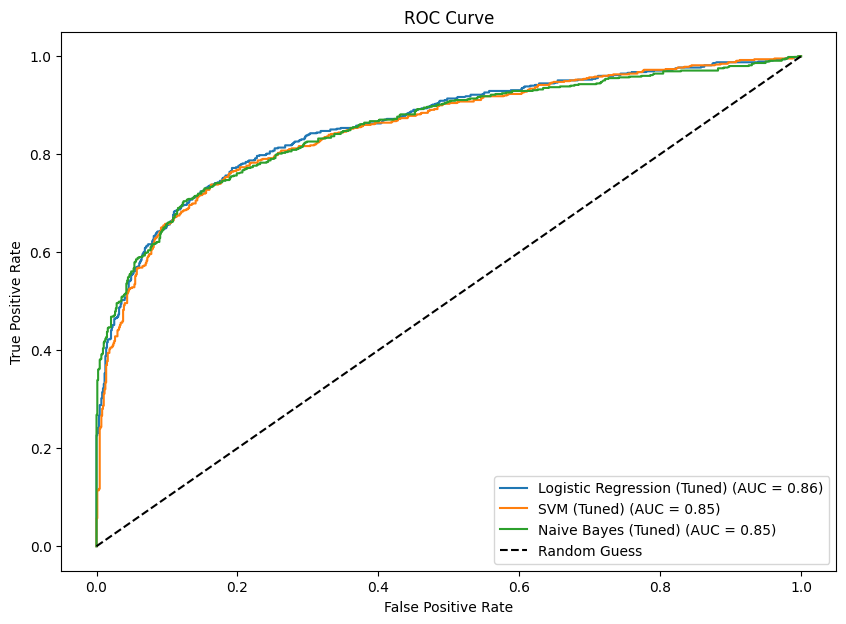

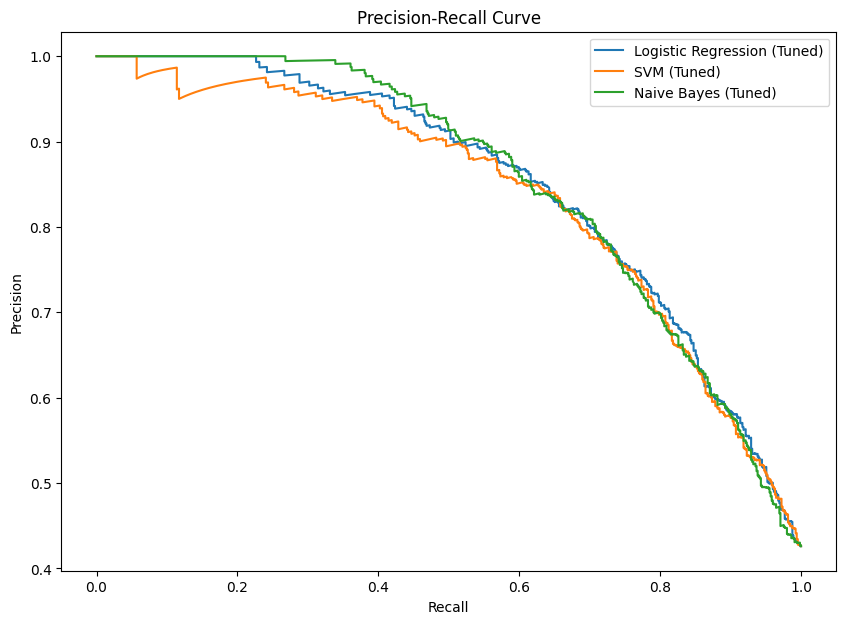

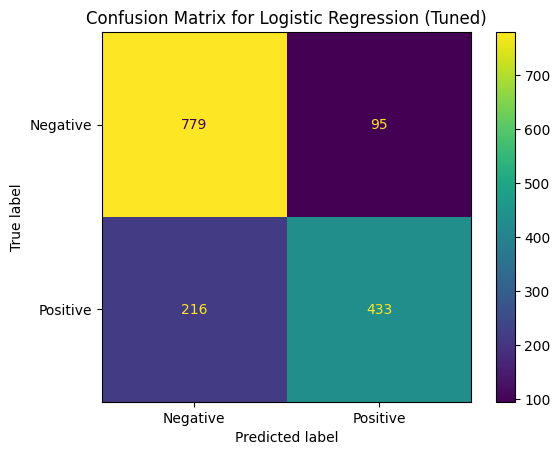

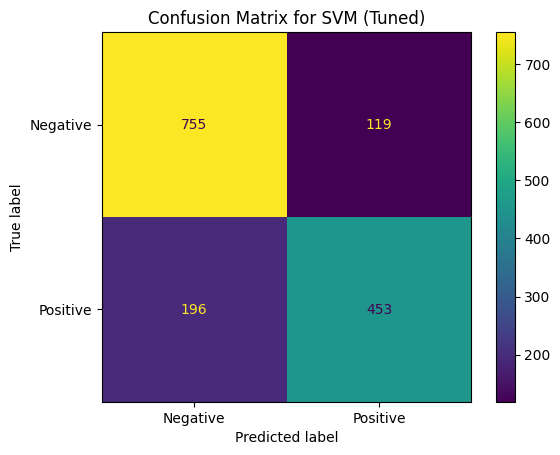

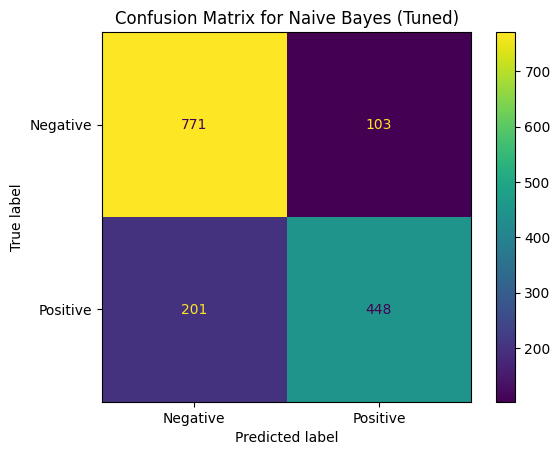

In [ ]:
# Plot ROC Curve
plot_roc_curve(models_with_preds, y_test, predictions_after_tuning, X_test)
# Plot the Precision-Recall Curve
plot_precision_recall_curve(models_with_preds, y_test, X_test) # Visualize confusion matrices
plot_confusion_matrices(models_after_tuning, y_test, predictions_after_tuning)


                                                   text  actual  predicted
2644  So you have a new weapon that can cause un-ima...       1          0
2227  The f$&amp;@ing things I do for #GISHWHES Just...       0          0
5448  DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...       1          0
132   Aftershock back to school kick off was great. ...       0          0
6845  in response to trauma Children of Addicts deve...       0          0
...                                                 ...     ...        ...
1835              @SmusX16475 Skype just crashed u host       0          0
506   Christian Attacked by Muslims at the Temple Mo...       1          1
3592  Man charged over fatal crash near Dubbo refuse...       1          1
6740  #usNWSgov Severe Weather Statement issued Augu...       1          1
1634  Great British &lt;b&gt;Bake&lt;/b&gt; Off's ba...       0          0

[1523 rows x 3 columns]
Misclassified examples (311):
                                             

<ipython-input-77-ea8823a89cd5>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified['tweet_length'] = misclassified['text'].apply(len)


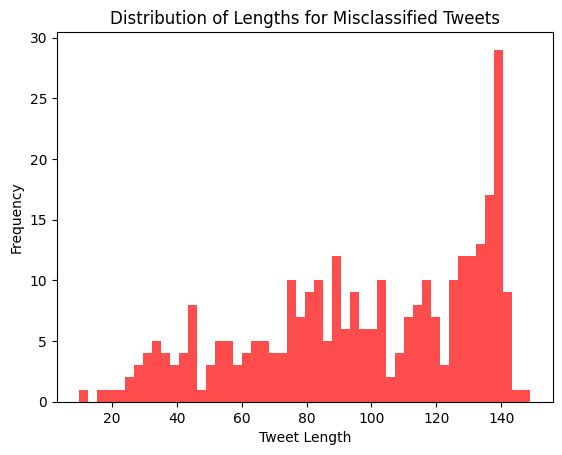

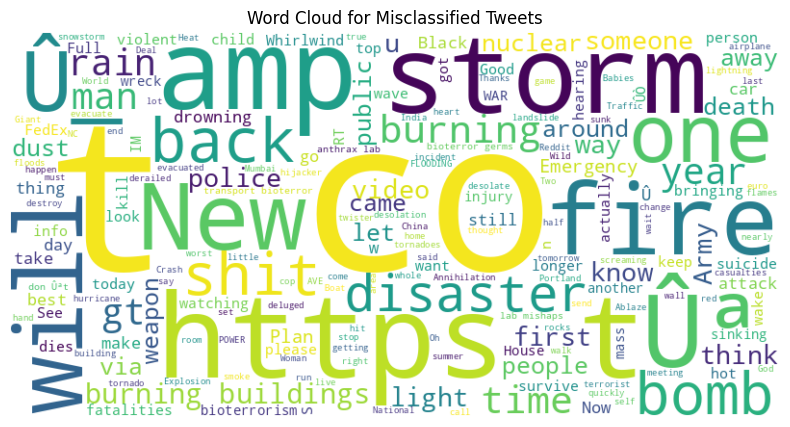

In [ ]:
import pandas as pd

# Assuming `log_reg_preds` is the prediction from Logistic Regression
# You can choose any model's predictions here, e.g., `svm_preds` or `naive_bayes_preds`

# Assuming 'X_test_indices' stores the indices of the test set in the original DataFrame
misclassified_df = pd.DataFrame({
    'text': train_data_cleaned.loc[test_indices, 'text'],  # Access the original text using test_indices
    'actual': y_test.values,
    'predicted': pred_log_reg  # Replace with your predictions
})
print(misclassified_df)


# Filter the misclassified examples
misclassified = misclassified_df[misclassified_df['actual'] != misclassified_df['predicted']]

# Display some misclassified examples
print(f"Misclassified examples ({len(misclassified)}):")
print(misclassified[['text', 'actual', 'predicted']].head())

# Analyze reasons for misclassification (based on keywords, length, etc.)
# You can start by analyzing the length of the misclassified tweets
misclassified['tweet_length'] = misclassified['text'].apply(len)

# Visualize tweet lengths of misclassified examples
plt.hist(misclassified['tweet_length'], bins=50, color='red', alpha=0.7)
plt.title('Distribution of Lengths for Misclassified Tweets')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

# Further analysis can be done by examining keywords, frequent phrases, or text patterns.
# You can look at word clouds or identify common terms for false positives or false negatives.

# Example: Generate word cloud for misclassified tweets
misclassified_text = ' '.join(misclassified['text'])
misclassified_wc = WordCloud(width=800, height=400, background_color='white').generate(misclassified_text)

# Plot word cloud for misclassified tweets
plt.figure(figsize=(10, 5))
plt.imshow(misclassified_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Misclassified Tweets')
plt.show()
